데이터 불러오기

In [77]:
import os
from os.path import join
import copy
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

In [78]:
data  = join('C:', 'wisc_bc_data.csv')

In [79]:
data = pd.read_csv(data)

In [80]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,911320502,B,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,...,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
565,898677,B,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,...,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
566,873885,M,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,...,17.80,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
567,911201,B,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,...,15.80,16.93,103.10,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810


결측치 확인

In [81]:
pd.isna(data).sum()

id                   0
diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    int64  
 1   diagnosis          569 non-null    object 
 2   radius_mean        569 non-null    float64
 3   texture_mean       569 non-null    float64
 4   perimeter_mean     569 non-null    float64
 5   area_mean          569 non-null    float64
 6   smoothness_mean    569 non-null    float64
 7   compactness_mean   569 non-null    float64
 8   concavity_mean     569 non-null    float64
 9   points_mean        569 non-null    float64
 10  symmetry_mean      569 non-null    float64
 11  dimension_mean     569 non-null    float64
 12  radius_se          569 non-null    float64
 13  texture_se         569 non-null    float64
 14  perimeter_se       569 non-null    float64
 15  area_se            569 non-null    float64
 16  smoothness_se      569 non

In [83]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


라벨 인코딩

In [84]:
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})

In [85]:
label = data['diagnosis']
compare = data.copy()
data.drop(columns='diagnosis',inplace=True)

In [86]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
label = le.fit_transform(label)

In [87]:
label

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,

필요없는 변수 제거

In [88]:
data.drop(columns='id',inplace=True)

feature selection 후 EDA 진행 예정.

In [89]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(data, label, 
                                                      test_size=0.3,
                                                      random_state=2020,
                                                      shuffle=True,
                                                      stratify=label)

In [90]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [91]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [92]:
from sklearn.metrics import accuracy_score
y_pred = xgb.predict(x_valid)
print('XGBoost, 정확도 : {:.2f}%'.format(accuracy_score(y_valid, y_pred)*100))

XGBoost, 정확도 : 96.49%


In [93]:
importances = pd.DataFrame({'feature': x_train.columns, 'importance': xgb.feature_importances_})
importances = importances.sort_values(by='importance',ascending=False)
importances.reset_index(drop=True, inplace=True)
importances

,feature,importance
0,perimeter_worst,0.283201
1,radius_worst,0.263810
2,points_mean,0.202802
3,points_worst,0.052661
4,area_worst,0.034399
5,area_mean,0.021816
6,smoothness_se,0.020224
7,concavity_worst,0.018401
8,texture_worst,0.014676
9,smoothness_mean,0.011895


약 90% 해당하는 변수 사용

In [94]:
importances['feature'].tolist()
using_variables= ['perimeter_worst',
 'radius_worst',
 'points_mean',
 'points_worst',
 'area_worst',
 'area_mean',
 'smoothness_se',
 'concavity_worst',
 'texture_worst']

In [95]:
#분석에 사용할 데이터
analysis = data[using_variables]
analysis

,perimeter_worst,radius_worst,points_mean,points_worst,area_worst,area_mean,smoothness_se,concavity_worst,texture_worst
0,86.97,13.50,0.03700,0.09391,549.1,464.1,0.008045,0.12420,15.64
1,78.28,11.88,0.02642,0.07926,424.8,346.4,0.007470,0.19160,22.94
2,79.93,12.41,0.02480,0.07431,471.4,373.2,0.005158,0.10670,26.44
3,76.53,11.92,0.04796,0.08611,434.0,384.8,0.011270,0.08669,15.77
4,104.50,16.20,0.02657,0.08178,819.1,711.8,0.005012,0.13620,15.73
...,...,...,...,...,...,...,...,...,...
564,95.10,14.90,0.02870,0.10450,687.6,537.3,0.005969,0.18760,23.89
565,70.89,10.88,0.02037,0.04074,357.1,321.6,0.017360,0.07162,19.48
566,113.80,17.80,0.03263,0.12260,973.1,710.6,0.003290,0.36300,28.03
567,103.10,15.80,0.06495,0.10690,749.9,644.2,0.006133,0.13730,16.93


종양 종류 별 개수 확인

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

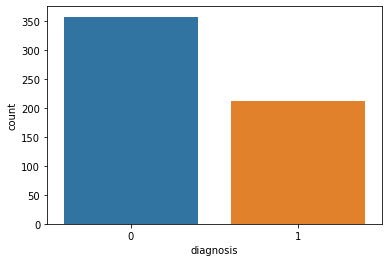

In [97]:
sns.countplot('diagnosis',data=compare)

radius distribution


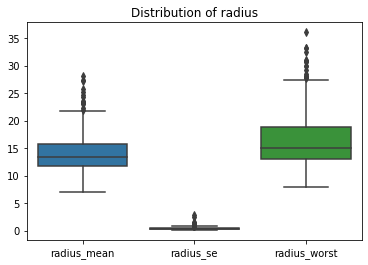

texture distribution


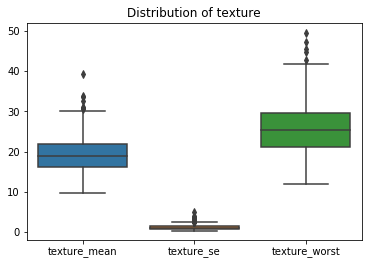

perimeter distribution


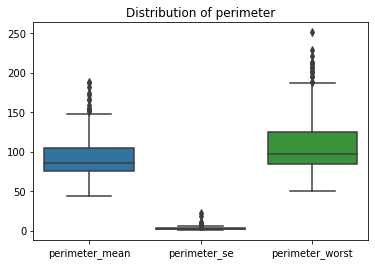

area distribution


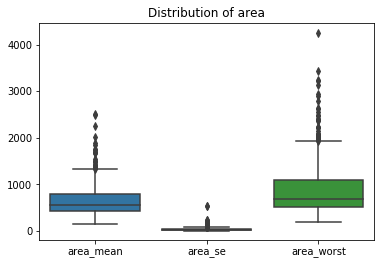

smoothness distribution


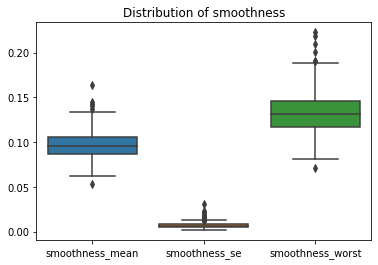

compactness distribution


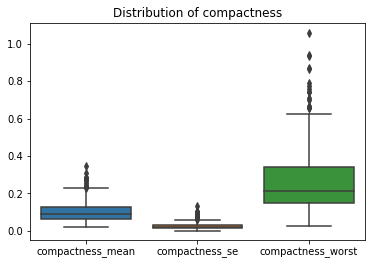

concavity distribution


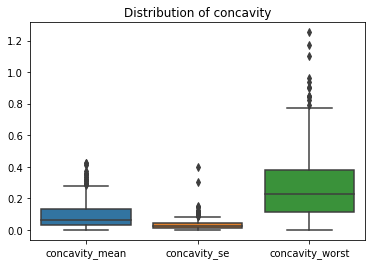

points distribution


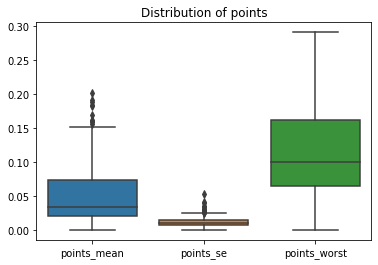

symmetry distribution


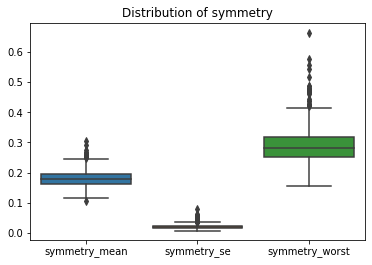

dimension distribution


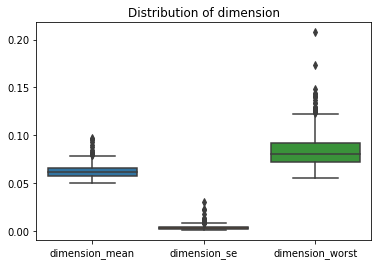

In [98]:
#캐글 eda 참고
features = ['radius','texture','perimeter','area','smoothness','compactness','concavity','points','symmetry','dimension']

for feature in features:
    print("{} distribution".format(feature))
    sns.boxplot(data=data[['{}_mean'.format(feature), '{}_se'.format(feature), '{}_worst'.format(feature)]])
    plt.title('Distribution of {}'.format(feature))
    plt.show()

radius distribution based on diagnosis


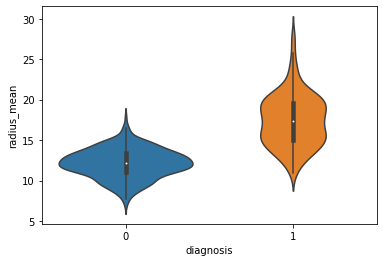

texture distribution based on diagnosis


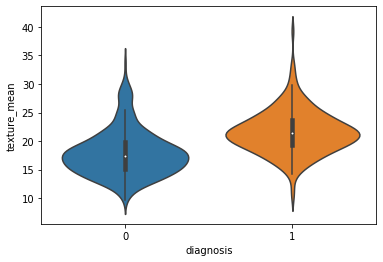

perimeter distribution based on diagnosis


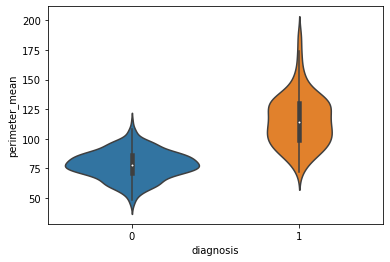

area distribution based on diagnosis


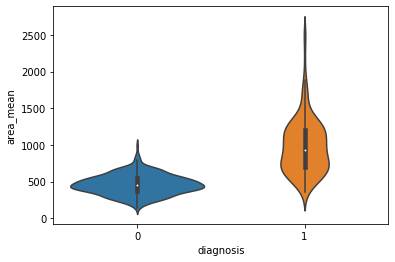

smoothness distribution based on diagnosis


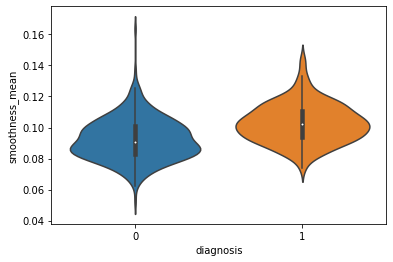

compactness distribution based on diagnosis


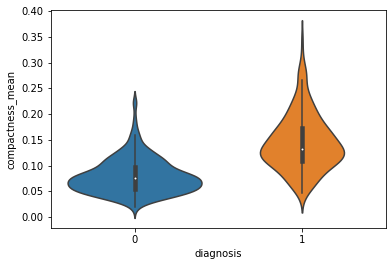

concavity distribution based on diagnosis


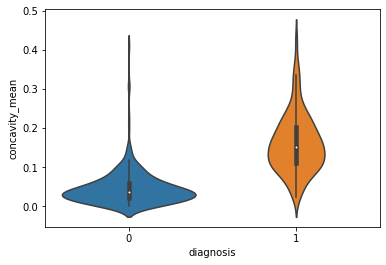

points distribution based on diagnosis


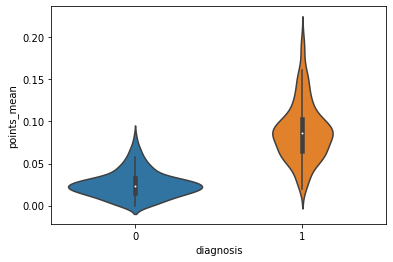

symmetry distribution based on diagnosis


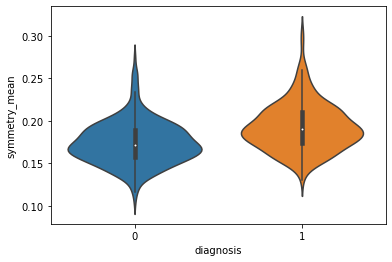

dimension distribution based on diagnosis


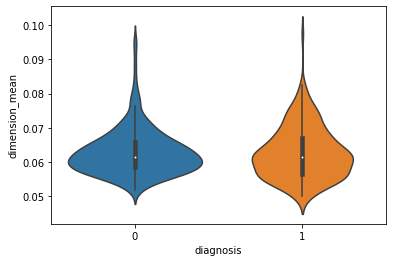

In [99]:
for feature in features:
    print("{} distribution based on diagnosis".format(feature))
    sns.violinplot(data=compare, x="diagnosis", y="{}_mean".format(feature), size=8)
    plt.show()

heatmap확인- 전반적으로 상관관계가 높다는 것을 알 수 있음.

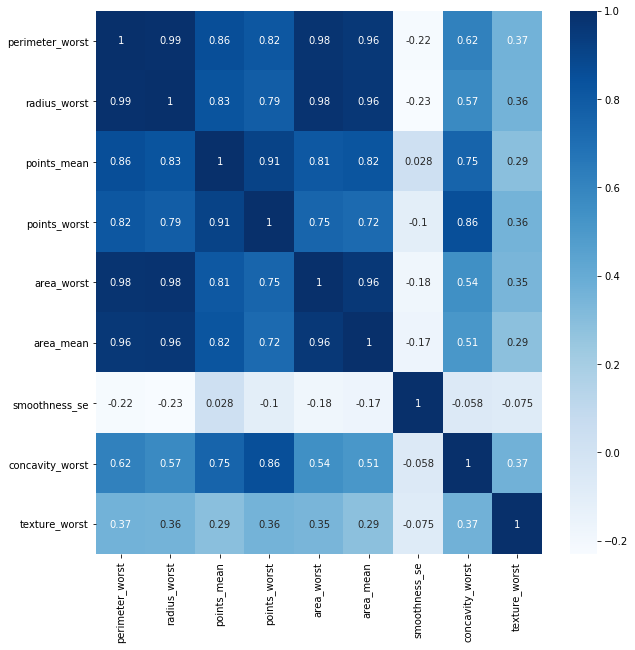

In [100]:
plt.figure(figsize=(10,10))
sns.heatmap(data = analysis.corr(), annot=True, cmap='Blues')

#분석 시작

전처리 프로세스(정규화 진행)
다중공선성 확인 안하는 이유: https://qastack.kr/stats/168622/why-is-multicollinearity-not-checked-in-modern-statistics-machine-learning

In [101]:
def preprocess(x_train, x_valid):
    tmp_x_train = x_train.copy()
    tmp_x_valid = x_valid.copy()
    
    x_train_mean = np.mean(analysis,axis=0)
    x_train_std = np.std(analysis, axis=0)
    
    tmp_x_train.loc[:,analysis.columns.tolist()] = (tmp_x_train - x_train_mean) / (x_train_std + 1e-4)
    tmp_x_valid.loc[:, analysis.columns.tolist()] = (tmp_x_valid - x_train_mean) / (x_train_std + 1e-4)
    
    
    return tmp_x_train, tmp_x_valid

OOF 앙상블(LGBM의 경우(리프 중심 트리분할) 적은 데이터에서 과적합 우려가 있어 사용 X)

In [102]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

stratified k-fold 

In [103]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2021)

In [120]:
val_scores = list()

for i, (trn_idx,val_idx) in enumerate(skf.split(analysis,label)):
    x_train, y_train = analysis.iloc[trn_idx,:], label[trn_idx,]
    x_valid, y_valid = analysis.iloc[val_idx,:], label[val_idx,]
    
    x_train, x_valid = preprocess(x_train, x_valid)
    
    clf = XGBClassifier(n_estimators=100, max_depth=6, random_state=2021)
    
    clf.fit(x_train, y_train)
    
    trn_f1 = f1_score(y_train, clf.predict(x_train))
    val_f1 = f1_score(y_valid,clf.predict(x_valid))
    
    print('{} Fold, train f1_score : {:.4f}, validation f1_score : {:.4f}'.format(i, trn_f1, val_f1))
    
    val_scores.append(val_f1)

# 교차 검증 F1 Score 평균 계산하기
print('Cross Validation Score : {:.4f}'.format(np.mean(val_scores)))
    
    

0 Fold, train f1_score : 1.0000, validation f1_score : 0.9756
1 Fold, train f1_score : 1.0000, validation f1_score : 0.9512
2 Fold, train f1_score : 1.0000, validation f1_score : 0.9438
3 Fold, train f1_score : 1.0000, validation f1_score : 0.9438
4 Fold, train f1_score : 1.0000, validation f1_score : 0.9756
Cross Validation Score : 0.9580


GridSearch(이 값을 바탕으로 하이퍼파라미터 설정)

In [117]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators':[50, 100, 150],
          'max_depth':[3, 5, 6, 7, 8, 9, 10], 
          'random_state':[2021] }

clf = GridSearchCV(XGBClassifier(), params, n_jobs=4, scoring='f1')

In [118]:
clf.fit(x_train,y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameter

In [119]:
print('GridSearchCV best f1 score : {:.4f}, best_params : {}'.format(clf.best_score_, clf.best_params_))

GridSearchCV best f1 score : 0.9468, best_params : {'max_depth': 6, 'n_estimators': 100, 'random_state': 2021}
